# Experiment on MUTAG benchmark
In this experiment, we will use the MUTAG benchmark to demonstrate how effective the cycle count embeddings on product graphs really are.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from data import MUTAG
from product import PRODUCTS
from cycle_counting import embed_graph_cycles

/home/maxl/anaconda3/envs/graph-gumbo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset
The MUTAG dataset is a benchmark for graph classification. It contains 188 graphs, each of which is a chemical compound. The task is to classify each graph into two classes: mutagenic or non-mutagenic. The dataset is available at [here](https://ls11-www.cs.tu-dortmund.de/staff/morris/graphkerneldatasets).

In [2]:
graphs, y = MUTAG()

## Experiment setup
We will choose the strong, tensor and modular graph product in combination with path graphs to 'expand' the original graphs from the dataset. Further, we will use the cycle count embeddings to embed the product graphs into a vector space of size 128 (which is more than enough for graphs of this size). For the classification task on the embeddings, we will use Random Forests with tuned hyperparameters.

The factor graphs, we are going to use are of the sizes between 5 and 30.

In [3]:
def evaluate(product, factor):

    # Embed graphs
    X = []
    for graph in graphs:
        expansion = product(graph, factor)
        X.append(embed_graph_cycles(expansion, 256))
    X = np.array(X)
    
    # Split into train and test (stratified)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    clf = RandomForestClassifier(random_state=42)
    params = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    search = GridSearchCV(clf, params, cv=5, n_jobs=-1)
    search.fit(X_train, y_train)  

    best_mean_accuracy = search.cv_results_['mean_test_score'][search.best_index_]
    best_std_accuracy = search.cv_results_['std_test_score'][search.best_index_]    
    print(f'CV Accuracy: {best_mean_accuracy:.3f} +/- {best_std_accuracy:.3f}\n')

    print('Evaluation on test set:')
    y_pred = search.predict(X_test)
    print(classification_report(y_test, y_pred, labels=[0, 1], target_names=['Mutagenic', 'Non-mutagenic']))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mutagenic', 'Non-mutagenic'])
    disp.plot(cmap='Blues')

## Modular product with path graphs

CV Accuracy: 0.860 +/- 0.049

Evaluation on test set:
               precision    recall  f1-score   support

    Mutagenic       0.82      0.69      0.75        13
Non-mutagenic       0.85      0.92      0.88        25

     accuracy                           0.84        38
    macro avg       0.84      0.81      0.82        38
 weighted avg       0.84      0.84      0.84        38



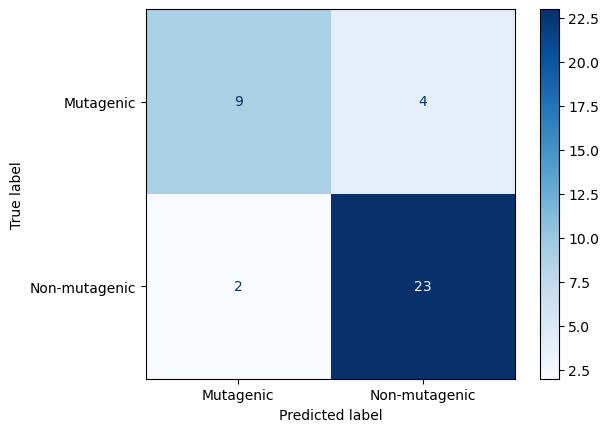

In [4]:
product = PRODUCTS['Modular']
factor = nx.path_graph(5)
evaluate(product, factor)

CV Accuracy: 0.867 +/- 0.037

Evaluation on test set:
               precision    recall  f1-score   support

    Mutagenic       0.75      0.69      0.72        13
Non-mutagenic       0.85      0.88      0.86        25

     accuracy                           0.82        38
    macro avg       0.80      0.79      0.79        38
 weighted avg       0.81      0.82      0.81        38



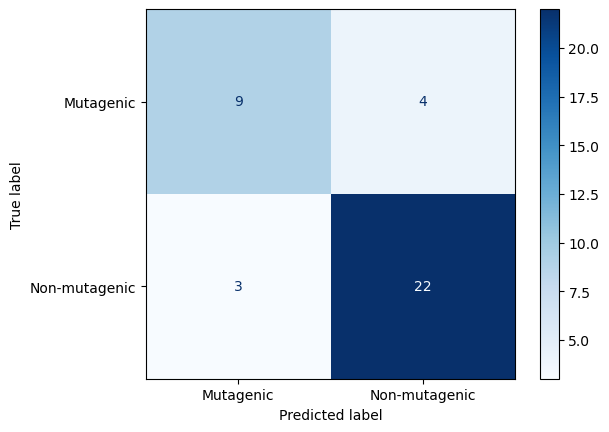

In [5]:
product = PRODUCTS['Modular']
factor = nx.path_graph(10)
evaluate(product, factor)

CV Accuracy: 0.840 +/- 0.057

Evaluation on test set:
               precision    recall  f1-score   support

    Mutagenic       0.90      0.69      0.78        13
Non-mutagenic       0.86      0.96      0.91        25

     accuracy                           0.87        38
    macro avg       0.88      0.83      0.84        38
 weighted avg       0.87      0.87      0.86        38



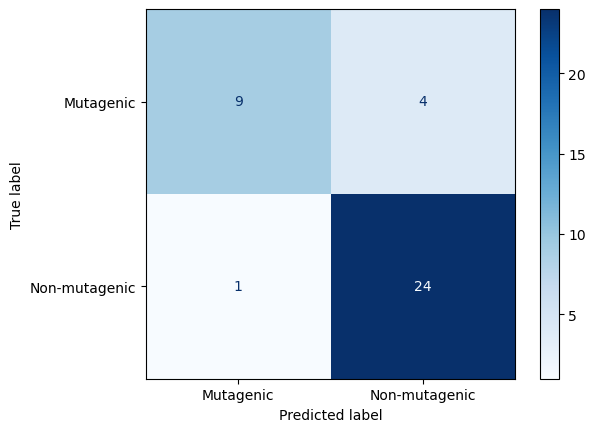

In [6]:
product = PRODUCTS['Modular']
factor = nx.path_graph(20)
evaluate(product, factor)

CV Accuracy: 0.873 +/- 0.025

Evaluation on test set:
               precision    recall  f1-score   support

    Mutagenic       0.64      0.54      0.58        13
Non-mutagenic       0.78      0.84      0.81        25

     accuracy                           0.74        38
    macro avg       0.71      0.69      0.70        38
 weighted avg       0.73      0.74      0.73        38



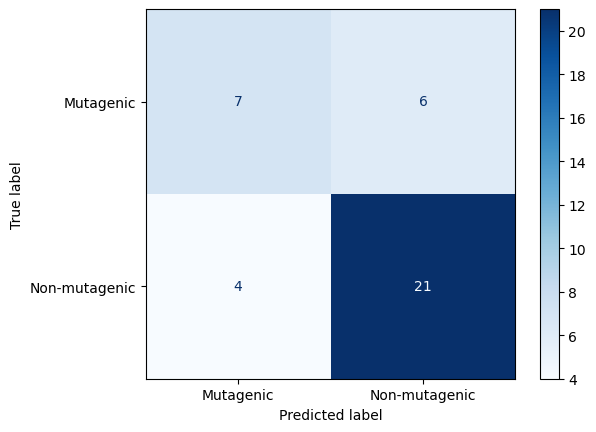

In [7]:
product = PRODUCTS['Modular']
factor = nx.path_graph(30)
evaluate(product, factor)

## Strong product with path graphs

CV Accuracy: 0.893 +/- 0.049

Evaluation on test set:
               precision    recall  f1-score   support

    Mutagenic       0.62      0.77      0.69        13
Non-mutagenic       0.86      0.76      0.81        25

     accuracy                           0.76        38
    macro avg       0.74      0.76      0.75        38
 weighted avg       0.78      0.76      0.77        38



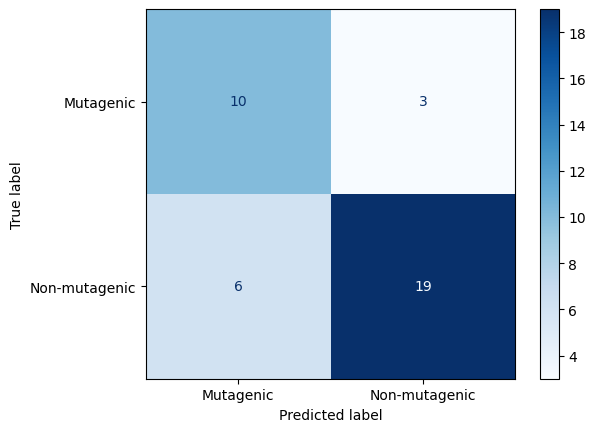

In [8]:
product = PRODUCTS['Strong']
factor = nx.path_graph(5)
evaluate(product, factor)

CV Accuracy: 0.873 +/- 0.057

Evaluation on test set:
               precision    recall  f1-score   support

    Mutagenic       0.83      0.77      0.80        13
Non-mutagenic       0.88      0.92      0.90        25

     accuracy                           0.87        38
    macro avg       0.86      0.84      0.85        38
 weighted avg       0.87      0.87      0.87        38



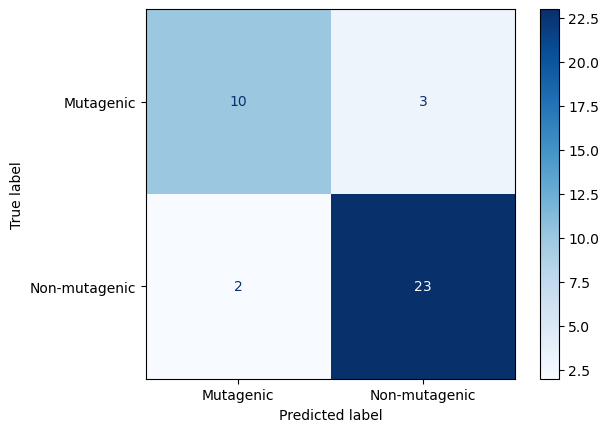

In [9]:
product = PRODUCTS['Strong']
factor = nx.path_graph(10)
evaluate(product, factor)

CV Accuracy: 0.847 +/- 0.045

Evaluation on test set:
               precision    recall  f1-score   support

    Mutagenic       0.82      0.69      0.75        13
Non-mutagenic       0.85      0.92      0.88        25

     accuracy                           0.84        38
    macro avg       0.84      0.81      0.82        38
 weighted avg       0.84      0.84      0.84        38



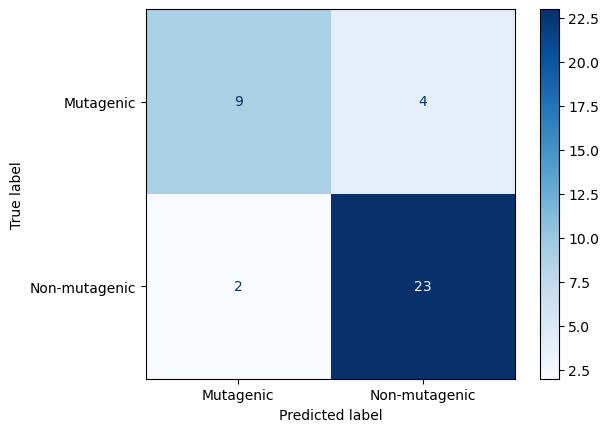

In [10]:
product = PRODUCTS['Strong']
factor = nx.path_graph(20)
evaluate(product, factor)

CV Accuracy: 0.867 +/- 0.056

Evaluation on test set:
               precision    recall  f1-score   support

    Mutagenic       0.82      0.69      0.75        13
Non-mutagenic       0.85      0.92      0.88        25

     accuracy                           0.84        38
    macro avg       0.84      0.81      0.82        38
 weighted avg       0.84      0.84      0.84        38



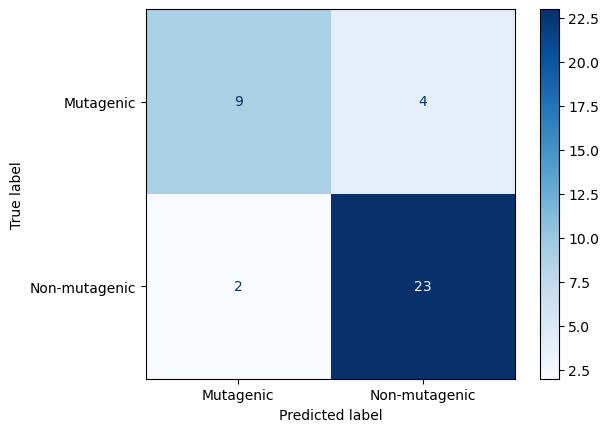

In [11]:
product = PRODUCTS['Strong']
factor = nx.path_graph(30)
evaluate(product, factor)